### Import Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model

### Load the dataset

In [2]:
path = 'CAT_2006-01-01_to_2018-01-01.csv'
data = pd.read_csv(path)
data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,57.87,58.11,57.05,57.80,3697500,CAT
1,2006-01-04,57.95,59.43,57.55,59.27,4577200,CAT
2,2006-01-05,59.02,59.86,59.00,59.27,4590700,CAT
3,2006-01-06,59.47,60.76,59.38,60.45,5692300,CAT
4,2006-01-09,60.45,61.68,60.45,61.55,4409300,CAT
...,...,...,...,...,...,...,...
3015,2017-12-22,154.77,155.80,153.95,155.75,2486378,CAT
3016,2017-12-26,156.04,156.98,155.66,156.44,1870565,CAT
3017,2017-12-27,156.94,157.69,156.31,157.52,2520486,CAT
3018,2017-12-28,157.94,158.65,157.23,158.42,4064049,CAT


In [3]:
data['Name'].value_counts()

Name
CAT    3020
Name: count, dtype: int64

### Convert Date to datetime

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

### Set Date as index

In [5]:
data.set_index('Date', inplace=True)

In [6]:
data

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,57.87,58.11,57.05,57.80,3697500,CAT
2006-01-04,57.95,59.43,57.55,59.27,4577200,CAT
2006-01-05,59.02,59.86,59.00,59.27,4590700,CAT
2006-01-06,59.47,60.76,59.38,60.45,5692300,CAT
2006-01-09,60.45,61.68,60.45,61.55,4409300,CAT
...,...,...,...,...,...,...
2017-12-22,154.77,155.80,153.95,155.75,2486378,CAT
2017-12-26,156.04,156.98,155.66,156.44,1870565,CAT
2017-12-27,156.94,157.69,156.31,157.52,2520486,CAT


### Display information about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


### Check for missing values

In [8]:
data.isnull().sum()

Open      1
High      1
Low       1
Close     0
Volume    0
Name      0
dtype: int64

### Display rows with missing values

In [9]:
print(data[data.isnull().any(axis=1)])

            Open  High  Low   Close   Volume Name
Date                                             
2017-07-31   NaN   NaN  NaN  113.95  4486013  CAT


### Drop rows with missing values

In [10]:
data = data.dropna()

# Option 2: Fill missing values (using forward fill as an example)
# data = data.fillna(method='ffill')

### Check again for missing values

In [11]:
print(data.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


### Display basic statistics

In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,80.479881,81.304230,79.568470,80.469096,7.048595e+06
std,20.922491,20.916641,20.928699,20.940414,4.216841e+06
min,22.650000,23.290000,21.710000,22.170000,1.775920e+05
25%,68.445000,69.220000,67.610000,68.445000,4.462426e+06
50%,81.820000,82.580000,80.760000,81.760000,6.030035e+06
75%,93.660000,94.460000,92.805000,93.520000,8.464836e+06
max,158.050000,158.650000,157.510000,158.420000,6.780610e+07


### Drop the 'Name' column

In [13]:
data.drop(columns=['Name'], inplace=True)

C:\Users\TVA\AppData\Local\Temp\ipykernel_15936\2239758229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Name'], inplace=True)


### Verify the column is dropped

In [14]:
print(data.head())

             Open   High    Low  Close   Volume
Date                                           
2006-01-03  57.87  58.11  57.05  57.80  3697500
2006-01-04  57.95  59.43  57.55  59.27  4577200
2006-01-05  59.02  59.86  59.00  59.27  4590700
2006-01-06  59.47  60.76  59.38  60.45  5692300
2006-01-09  60.45  61.68  60.45  61.55  4409300


### Plotting the Close price over time

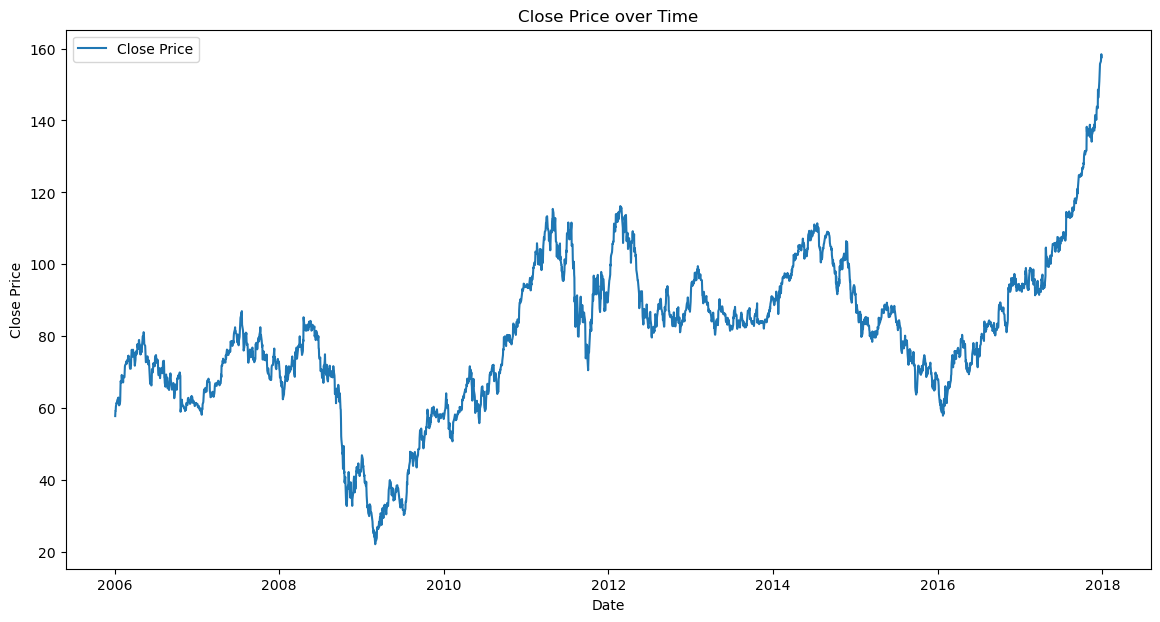

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Plotting the Volume over time

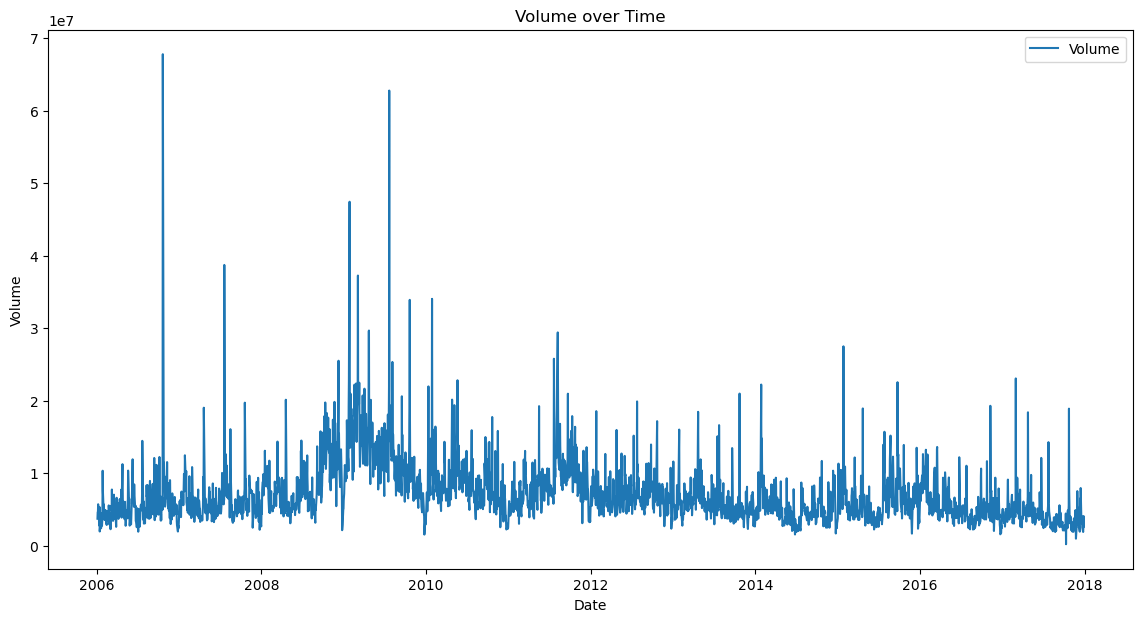

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Volume')
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Correlation matrix

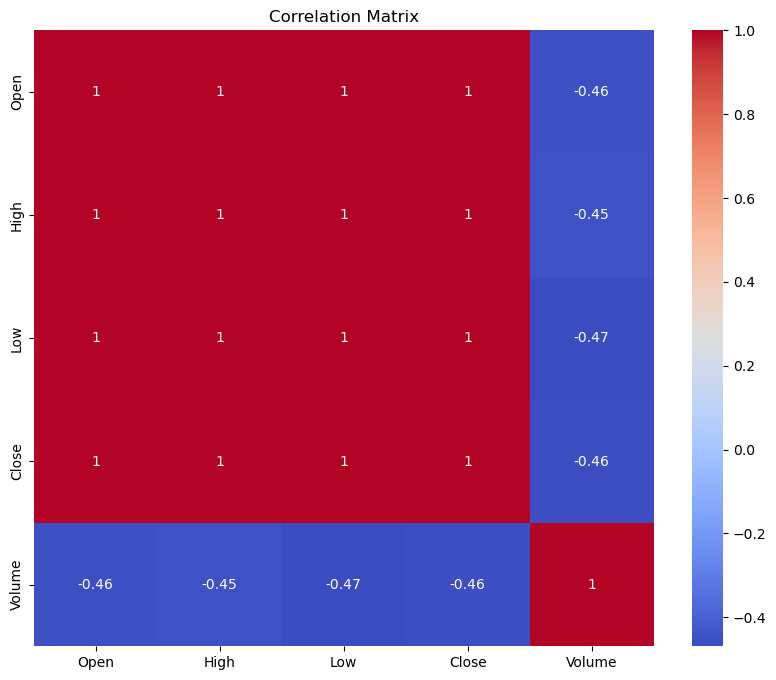

In [17]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Initialize the scaler

In [18]:
scaler = MinMaxScaler()

### Scale the data

In [19]:
scaled_data = scaler.fit_transform(data)

### Convert back to a dataframe

In [20]:
scaled_data = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume'], index=data.index)

In [21]:
scaled_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,0.260118,0.257240,0.260236,0.261505,0.052048
2006-01-04,0.260709,0.266992,0.263918,0.272294,0.065056
2006-01-05,0.268612,0.270168,0.274595,0.272294,0.065255
2006-01-06,0.271935,0.276817,0.277393,0.280954,0.081544
2006-01-09,0.279173,0.283614,0.285272,0.289028,0.062573


### Function to create sequences

In [22]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][-2]  # 'Close' is the second last column
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

### Set sequence length

In [23]:
seq_length = 90

### Create sequences

In [24]:
X, y = create_sequences(scaled_data.values, seq_length)

### Split the data into training and test sets

In [25]:
split = int(0.7 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [26]:
print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}')

X_train shape: (2050, 90, 5)
X_test shape: (879, 90, 5)


### Build the LSTM model

In [27]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1))

lstm_model.summary()

C:\Users\TVA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 90, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

### Plot the model

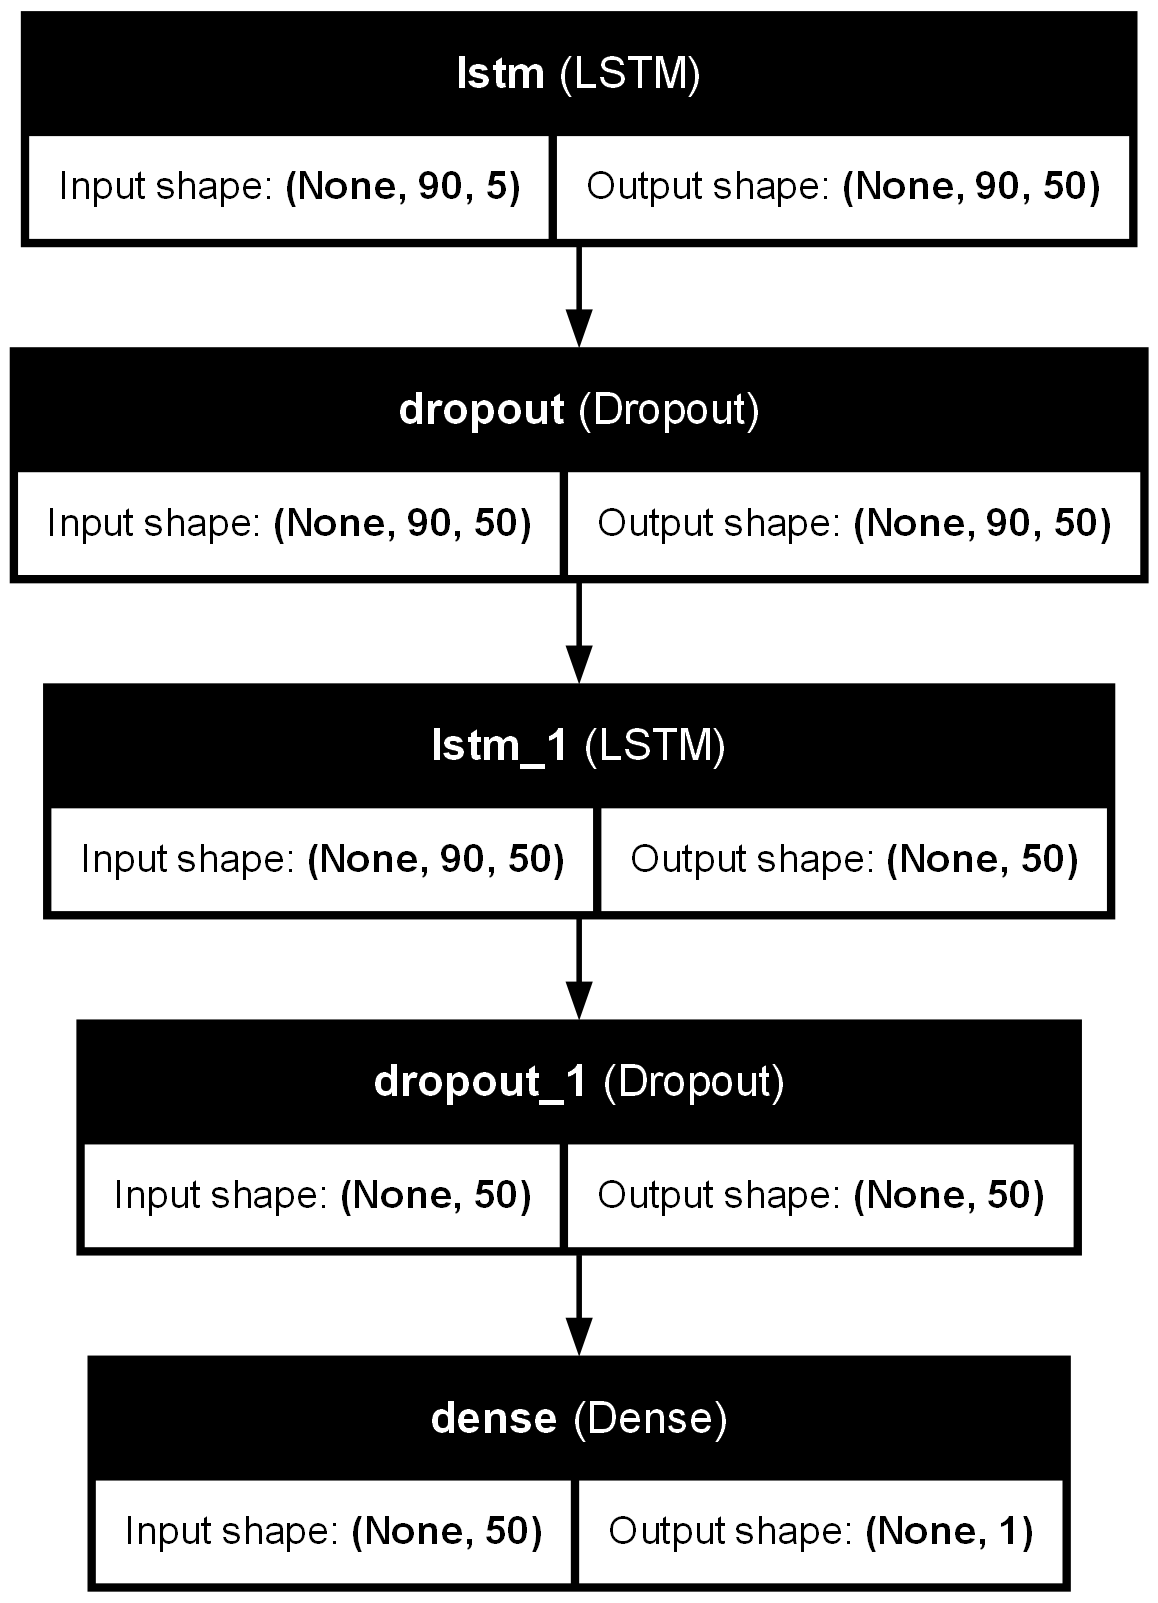

In [28]:
plot_model(lstm_model, to_file='lstm_model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model

In [29]:
lstm_model.compile(optimizer='Adam', loss='mean_squared_error')

### Train the model

In [30]:
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0243 - val_loss: 0.0020
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0042 - val_loss: 2.3273e-04
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0035 - val_loss: 3.5552e-04
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0029 - val_loss: 7.9897e-04
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0028 - val_loss: 7.4611e-04
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0028 - val_loss: 2.9116e-04
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023 - val_loss: 7.6829e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0022 - val_loss: 6.4103e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0020 - val_loss: 1.8004e-04
Epoch 12/100
58/58 ━

### Evaluate the model

In [31]:
loss = lstm_model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5748e-04
Test loss: 0.00016364382463507354


### Make predictions

In [32]:
predictions = lstm_model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


### Ensure predictions and true values are 2D

In [33]:
predictions = predictions.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

### Inverse transform predictions and true values

In [34]:
predictions_full = np.zeros((predictions.shape[0], scaled_data.shape[1]))
y_test_full = np.zeros((y_test.shape[0], scaled_data.shape[1]))

In [35]:
predictions_full[:, -2] = predictions[:, 0]
y_test_full[:, -2] = y_test[:, 0]

In [36]:
predictions = scaler.inverse_transform(predictions_full)[:, -2]
y_test = scaler.inverse_transform(y_test_full)[:, -2]

### Plot the results

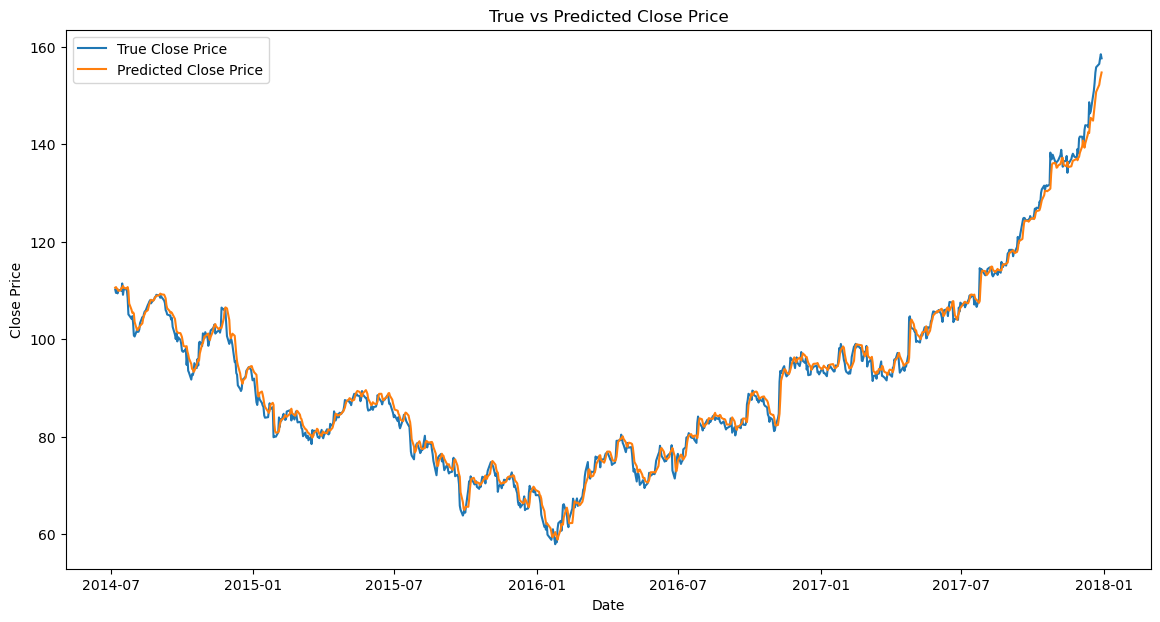

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='True Close Price')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Close Price')
plt.title('True vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Save the model

In [38]:
lstm_model.save("lstm_model.h5")